In [37]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [38]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [39]:
pd.Series(y).value_counts(normalize=True)

Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [40]:
pd.Series(y).value_counts(normalize=True)

Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [41]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

In [44]:
import matplotlib.pyplot as plt

C:\Users\Kasia\AppData\Local\Temp\ipykernel_12436\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


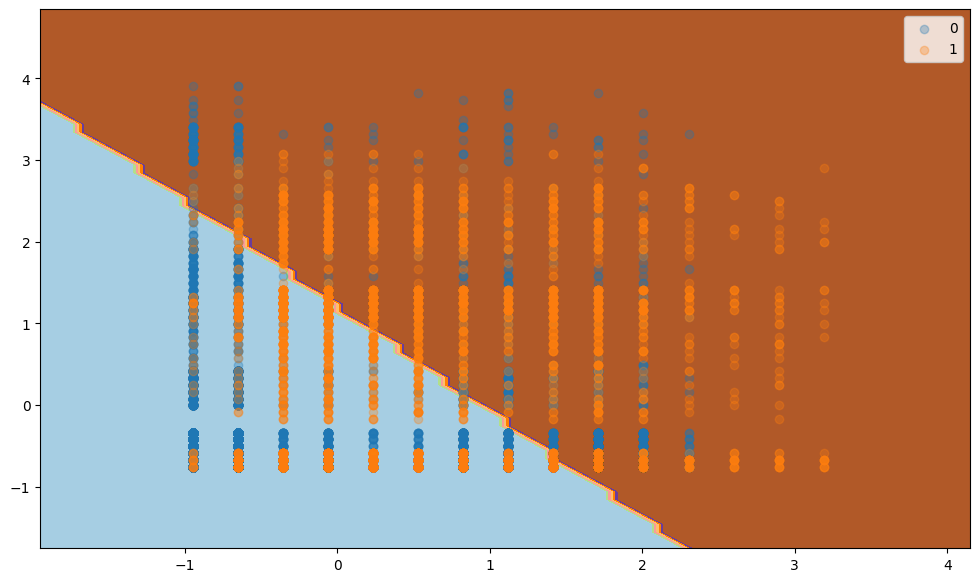

In [45]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [46]:
predictions_lr = model_lr.predict(X_test_standardized)

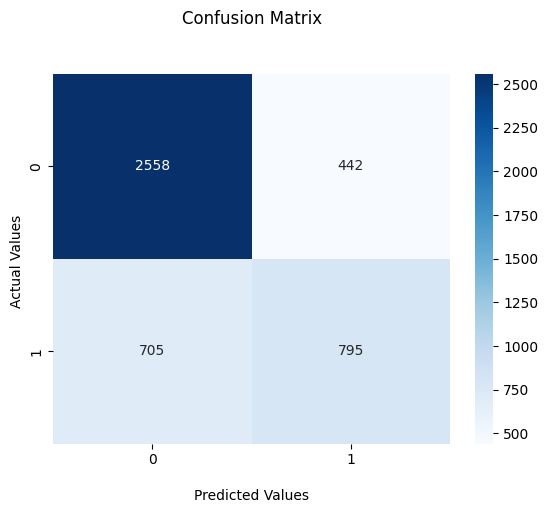

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



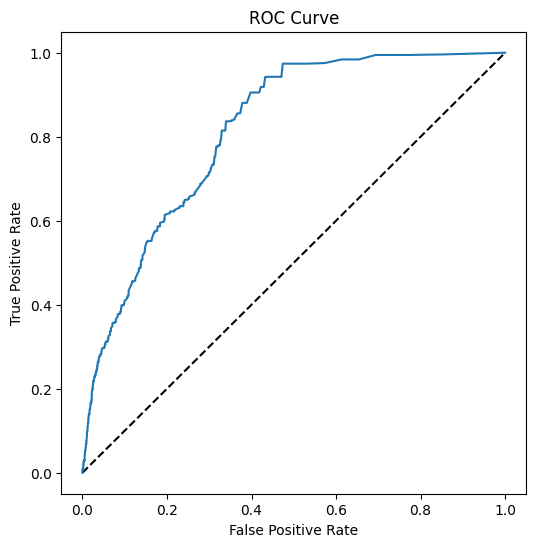

AUC: 0.8164931111111111


In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

In [51]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

# plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



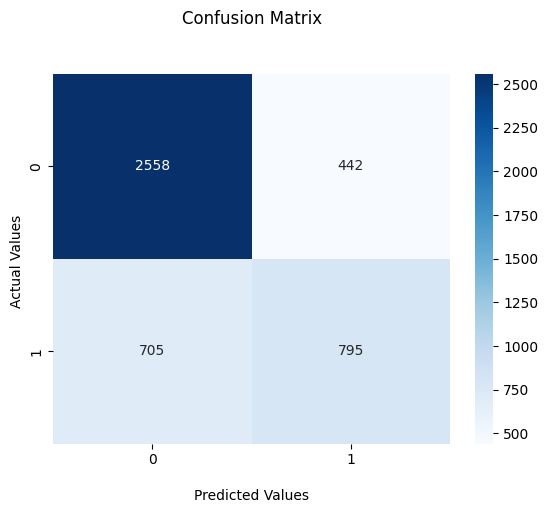

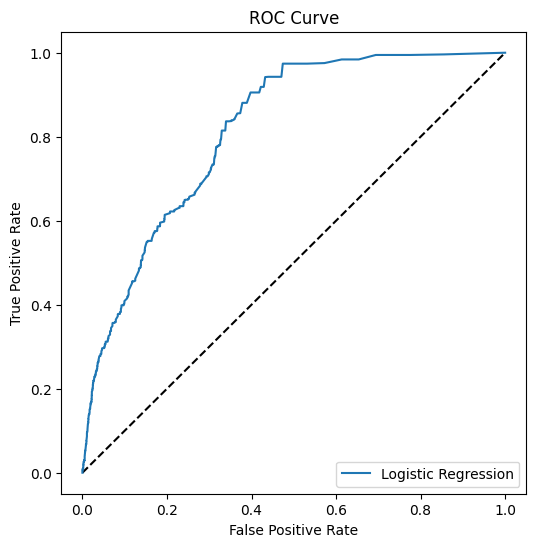

C:\Users\Kasia\AppData\Local\Temp\ipykernel_12436\2557299427.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [52]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

### Sprawdź jak zachowuje się model dla różnych regularyzacji i ich stopnia

**Stopień regularyzacji**
Parametr C kontroluje siłę regularyzacji:

Domyślnie: C=1.0.

Im mniejsze C, tym silniejsza regularyzacja.

Im większe C, tym słabsza regularyzacja.

**Rodzaj regularyzacji**
Parametr penalty określa rodzaj regularyzacji:

'l1': Regularyzacja Lasso (sparse weights).

'l2': Regularyzacja Ridge (smooth weights, domyślna).

'elasticnet': Kombinacja l1 i l2 (wymaga określenia l1_ratio).

'none': Brak regularyzacji.
Uwaga:

Aby używać l1 lub elasticnet, musisz ustawić solver='saga' lub solver='liblinear' (dla l1 tylko liblinear dla małych danych).
Domyślny solver, lbfgs, obsługuje tylko l2 i none.

C:\Users\Kasia\AppData\Local\Temp\ipykernel_12436\347193585.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


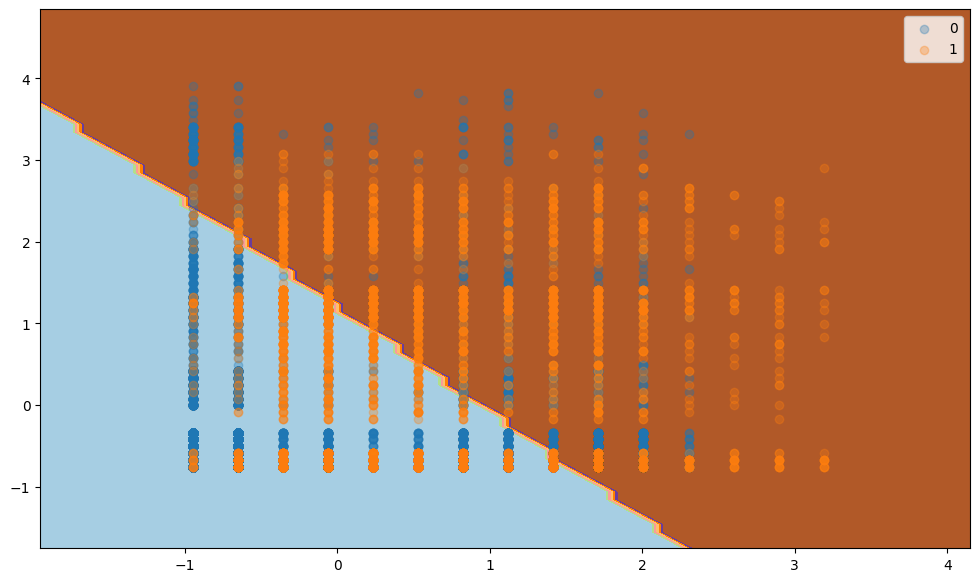

C:\Users\Kasia\AppData\Local\Temp\ipykernel_12436\347193585.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


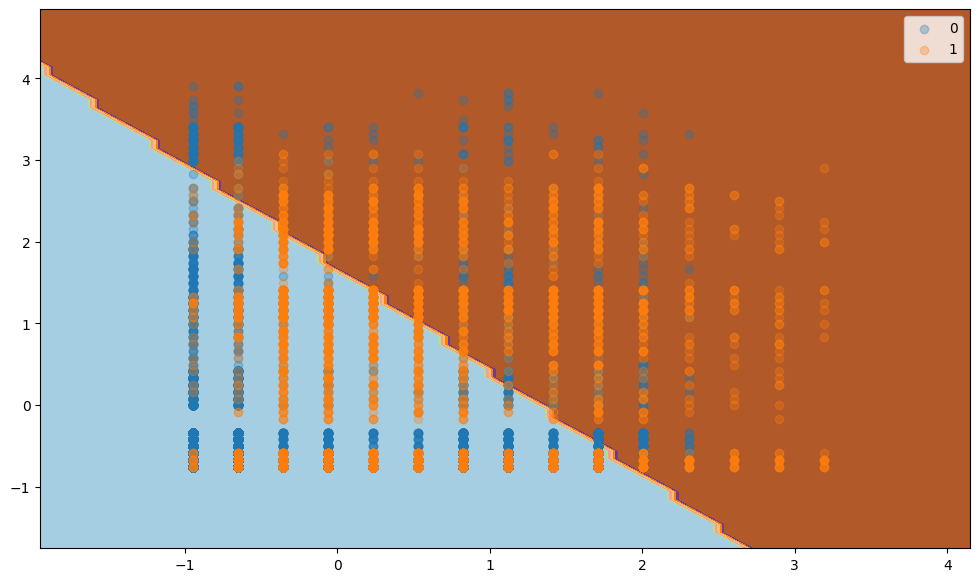

C:\Users\Kasia\AppData\Local\Temp\ipykernel_12436\347193585.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


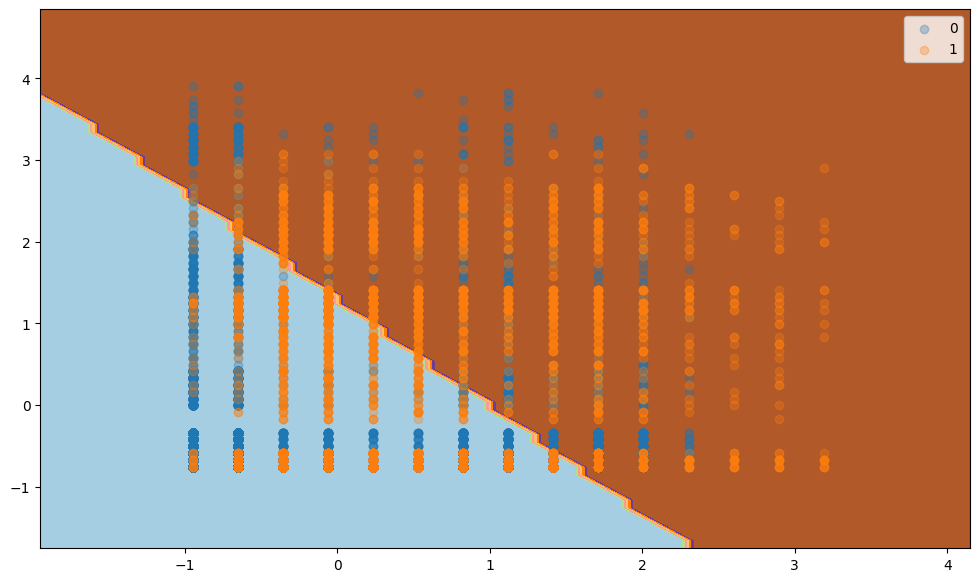

C:\Users\Kasia\AppData\Local\Temp\ipykernel_12436\347193585.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


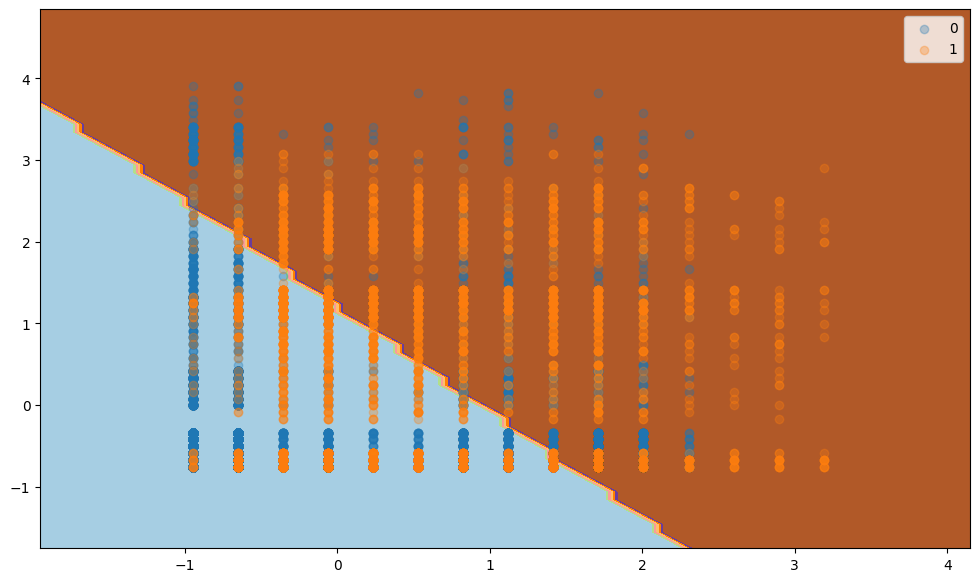

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from numpy import arange, meshgrid, hstack, where

# Trenowanie modeli
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

model_l1 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=1000)
model_l1.fit(X_train_standardized, y_train)

model_l2 = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', max_iter=1000)
model_l2.fit(X_train_standardized, y_train)

model_elasticnet = LogisticRegression(penalty='elasticnet', C=100, solver='saga', l1_ratio=0.5, max_iter=1000)
model_elasticnet.fit(X_train_standardized, y_train)

# Funkcja do wizualizacji granicy decyzji
def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # Określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # Skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # Utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # Przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # Stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1, r2))

    # Predykcja modelu dla siatki
    yhat = trained_model.predict(grid)

    # Przetworzenie predykcji na decyzję dla każdego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # Wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # Tworzenie wykresu punktowego dla klas
    for class_value in range(2):
        # Przyporządkowanie klasy (y) do obserwacji (X)
        row_ix = where(y_plot == class_value)

        # Stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # Wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

# Wizualizacja wyników dla każdego modelu

# Dla modelu LR
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

# Dla modelu L2
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_l2)

# Dla modelu L1
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_l1)

# Dla model_elasticnet
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_elasticnet)


In [55]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(f"Results for {name}:")
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})],
                                                 ignore_index=True)

    return metrics_dataframe

Results for Logistic Regression (No Regularization):
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



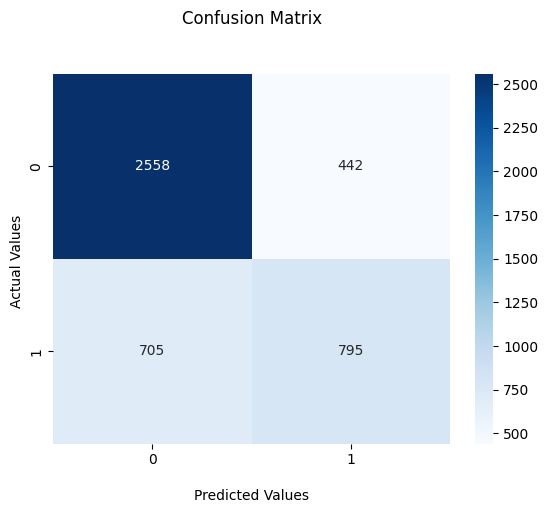

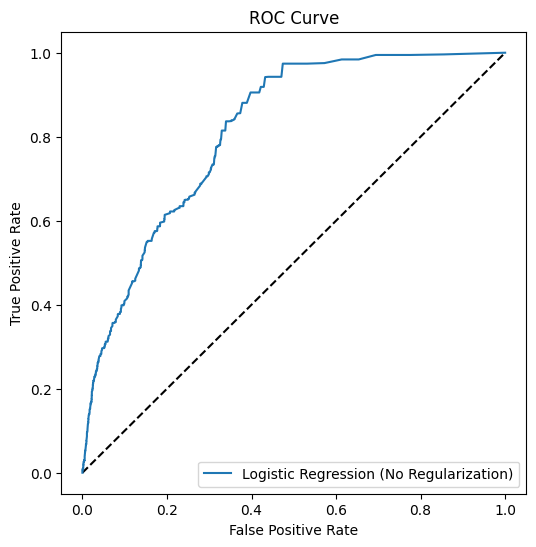

C:\Users\Kasia\AppData\Local\Temp\ipykernel_12436\1571809871.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})],


Results for Logistic Regression (L1 Regularization):
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3000
           1       0.64      0.51      0.57      1500

    accuracy                           0.74      4500
   macro avg       0.71      0.68      0.69      4500
weighted avg       0.73      0.74      0.73      4500



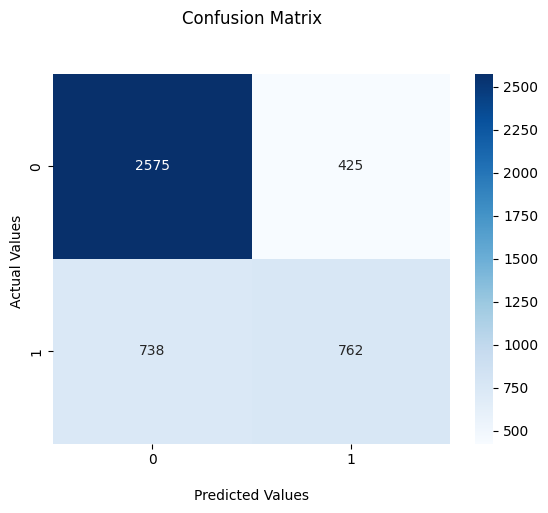

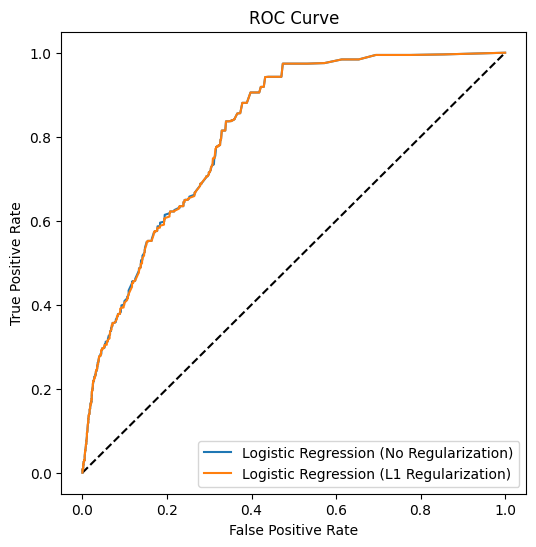

Results for Logistic Regression (L2 Regularization):
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      3000
           1       0.68      0.40      0.51      1500

    accuracy                           0.74      4500
   macro avg       0.72      0.65      0.66      4500
weighted avg       0.73      0.74      0.72      4500



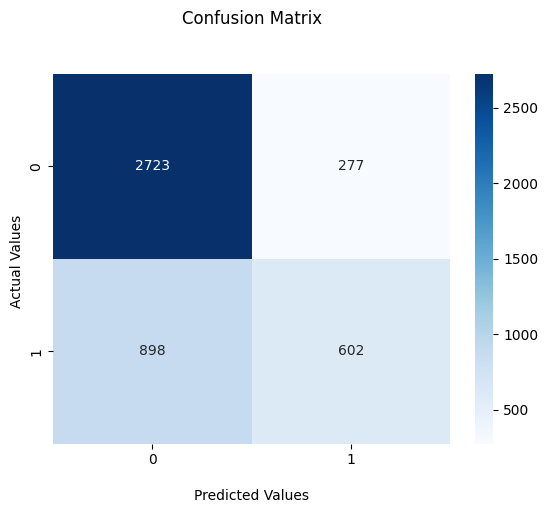

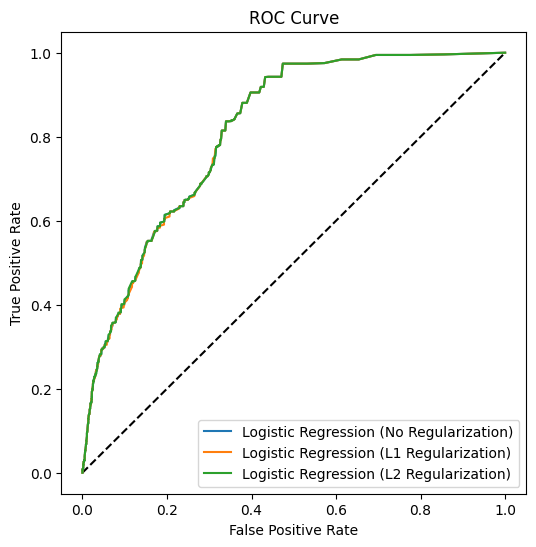

Results for Logistic Regression (elasticnet):
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



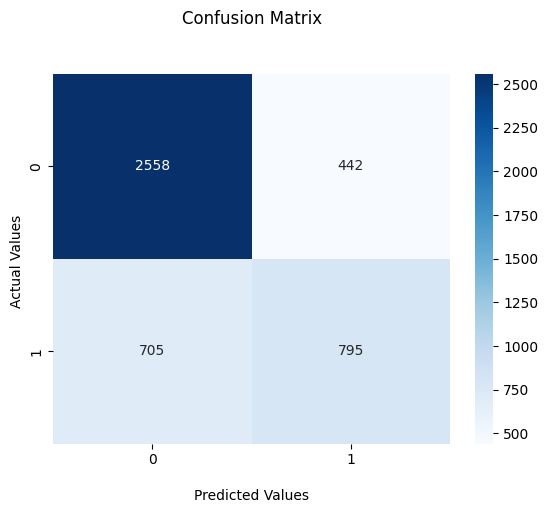

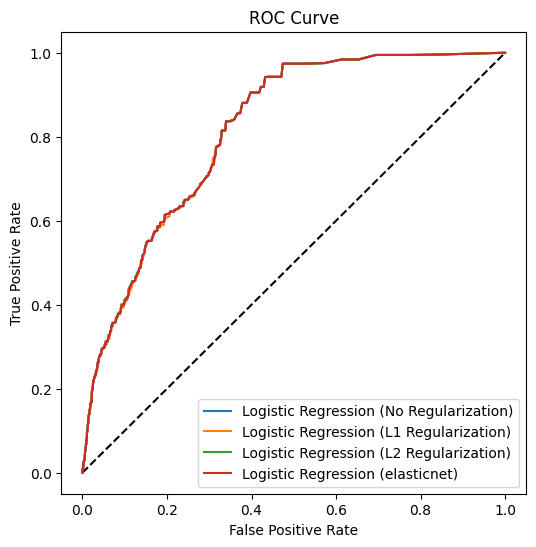

                                     Model  F1_score       AUC
0  Logistic Regression (No Regularization)  0.580928  0.816493
1  Logistic Regression (L1 Regularization)  0.567175  0.816049
2  Logistic Regression (L2 Regularization)  0.506095  0.816606
3         Logistic Regression (elasticnet)  0.580928  0.816493


In [56]:
# Wywołanie funkcji calculate_metrics dla każdego modelu
metrics_dataframe = calculate_metrics(model_lr, 'Logistic Regression (No Regularization)', X_test_standardized, y_test)
metrics_dataframe = calculate_metrics(model_l1, 'Logistic Regression (L1 Regularization)', X_test_standardized, y_test)
metrics_dataframe = calculate_metrics(model_l2, 'Logistic Regression (L2 Regularization)', X_test_standardized, y_test)
metrics_dataframe = calculate_metrics(model_elasticnet, 'Logistic Regression (elasticnet)', X_test_standardized, y_test)

# Wyświetlenie zbioru wyników
print(metrics_dataframe)

In [57]:
from sklearn.metrics import f1_score

y_train_pred = model_lr.predict(X_train_standardized)  # Predykcje na zbiorze treningowym
y_test_pred = model_lr.predict(X_test_standardized) # Predykcje na zbiorze test
f1_train = f1_score(y_train, y_train_pred)  # F1 score na zbiorze treningowym
f1_test = f1_score(y_test, y_test_pred)  # F1 score na zbiorze test
print(f"F1 score na zbiorze treningowym: {f1_train:.4f}")
print(f"F1 score na zbiorze testowym: {f1_test:.4f}")


F1 score na zbiorze treningowym: 0.5469
F1 score na zbiorze testowym: 0.5809


In [58]:
y_train_pred = model_l1.predict(X_train_standardized)  # Predykcje na zbiorze treningowym
y_test_pred = model_l1.predict(X_test_standardized) # Predykcje na zbiorze test
f1_train = f1_score(y_train, y_train_pred)  # F1 score na zbiorze treningowym
f1_test = f1_score(y_test, y_test_pred)  # F1 score na zbiorze test
print(f"F1 score na zbiorze treningowym: {f1_train:.4f}")
print(f"F1 score na zbiorze testowym: {f1_test:.4f}")


F1 score na zbiorze treningowym: 0.5353
F1 score na zbiorze testowym: 0.5672


In [59]:
y_train_pred = model_l2.predict(X_train_standardized)  # Predykcje na zbiorze treningowym
y_test_pred = model_l2.predict(X_test_standardized) # Predykcje na zbiorze test
f1_train = f1_score(y_train, y_train_pred)  # F1 score na zbiorze treningowym
f1_test = f1_score(y_test, y_test_pred)  # F1 score na zbiorze test
print(f"F1 score na zbiorze treningowym: {f1_train:.4f}")
print(f"F1 score na zbiorze testowym: {f1_test:.4f}")


F1 score na zbiorze treningowym: 0.4693
F1 score na zbiorze testowym: 0.5061


In [61]:
y_train_pred = model_elasticnet.predict(X_train_standardized)  # Predykcje na zbiorze treningowym
y_test_pred = model_elasticnet.predict(X_test_standardized) # Predykcje na zbiorze test
f1_train = f1_score(y_train, y_train_pred)  # F1 score na zbiorze treningowym
f1_test = f1_score(y_test, y_test_pred)  # F1 score na zbiorze test
print(f"F1 score na zbiorze treningowym: {f1_train:.4f}")
print(f"F1 score na zbiorze testowym: {f1_test:.4f}")


F1 score na zbiorze treningowym: 0.5469
F1 score na zbiorze testowym: 0.5809
